In [19]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline
plt.rcParams['figure.figsize'] = (21, 14)

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [3]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [4]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [5]:
print(clubs)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [6]:
nx.degree(G)

{'Brenda Rogers': 7,
 'Charlotte McDowd': 4,
 'Dorothy Murchison': 2,
 'E1': 3,
 'E10': 5,
 'E11': 4,
 'E12': 6,
 'E13': 3,
 'E14': 3,
 'E2': 3,
 'E3': 6,
 'E4': 4,
 'E5': 8,
 'E6': 8,
 'E7': 10,
 'E8': 14,
 'E9': 12,
 'Eleanor Nye': 4,
 'Evelyn Jefferson': 8,
 'Flora Price': 2,
 'Frances Anderson': 4,
 'Helen Lloyd': 5,
 'Katherina Rogers': 6,
 'Laura Mandeville': 7,
 'Myra Liddel': 4,
 'Nora Fayette': 8,
 'Olivia Carleton': 2,
 'Pearl Oglethorpe': 3,
 'Ruth DeSand': 4,
 'Sylvia Avondale': 7,
 'Theresa Anderson': 8,
 'Verne Sanderson': 4}

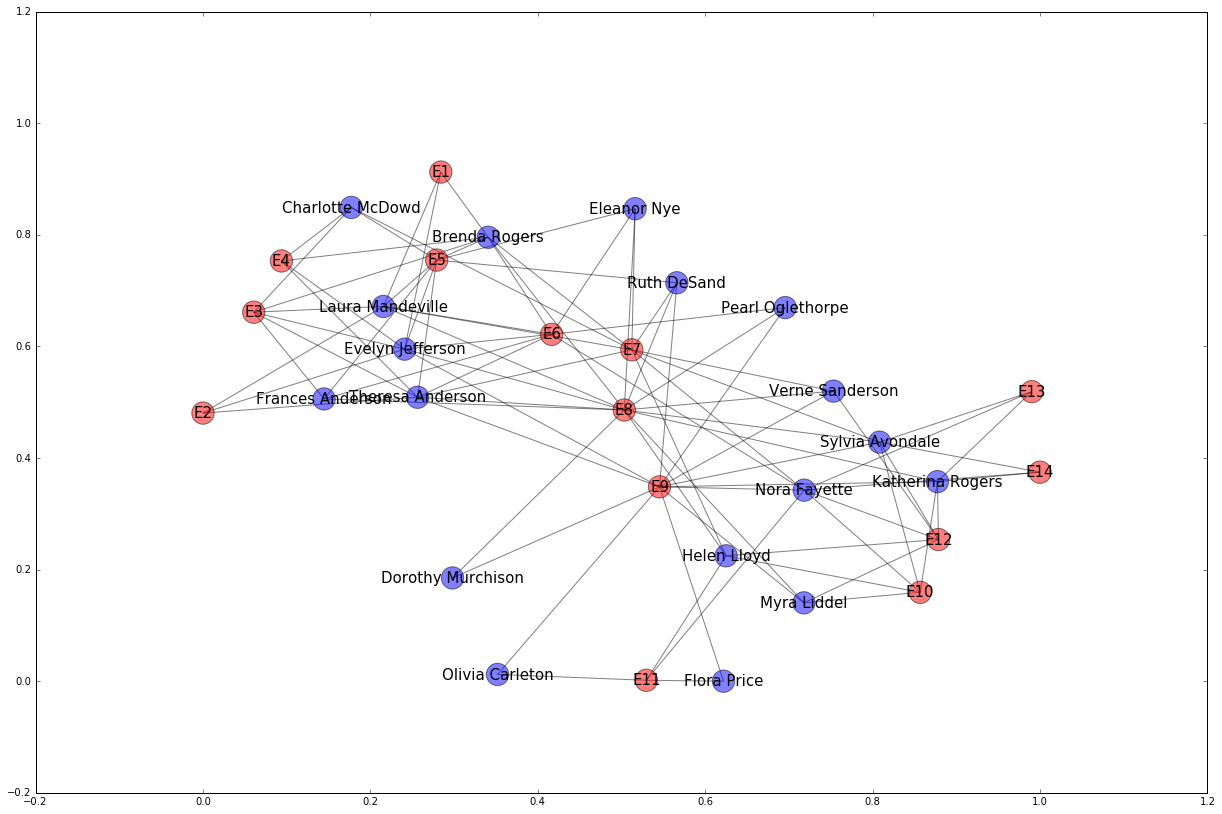

In [7]:
color = []
for n in G.degree().keys():
    if n in G.degree(clubs).keys():
        color.append('r')
    else:
        color.append('b')

nx.draw_networkx(G, with_labels=True, node_size = 500, alpha = .5, node_color=color, font_size=15)
plt.show()

In [8]:
# project bipartite graph onto women nodes
W = nx.bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


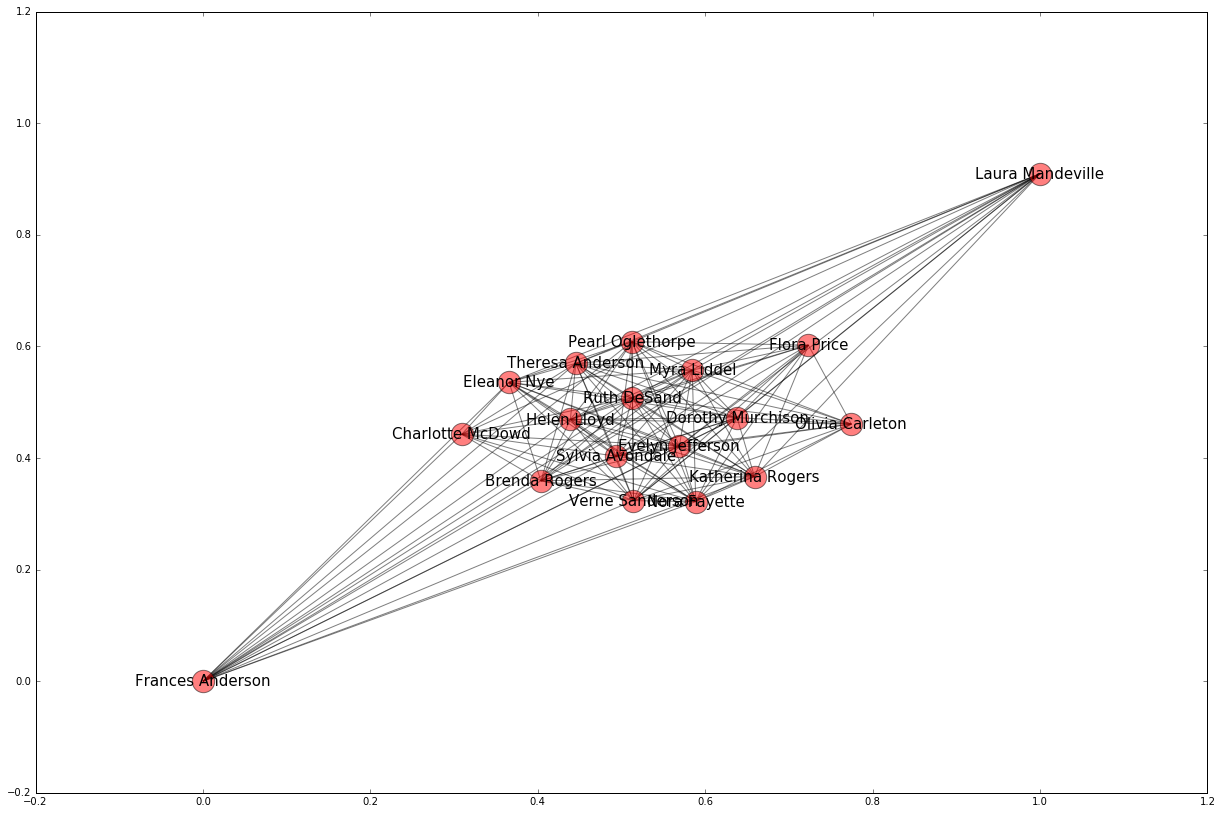

In [9]:
nx.draw_networkx(W, with_labels=True, node_size = 500, alpha = .5, font_size=15)
plt.show()

In [10]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = nx.bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


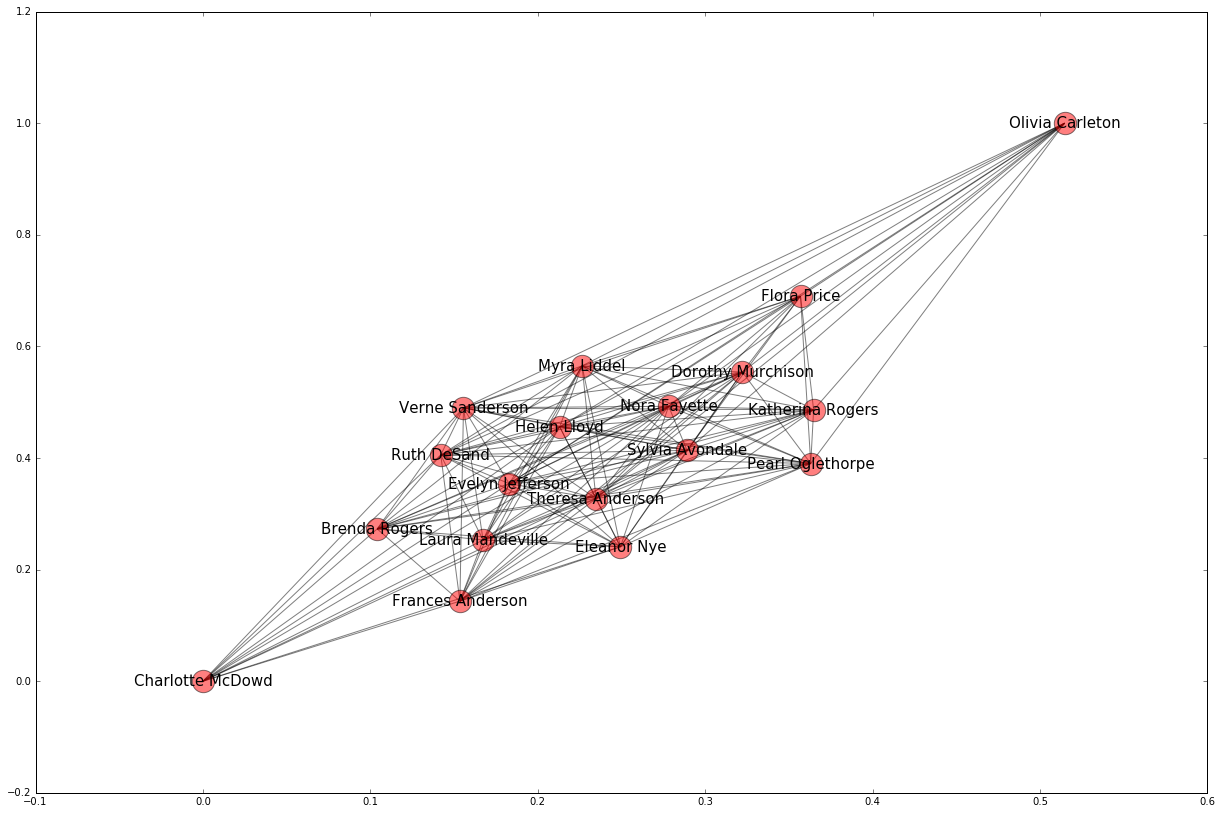

In [11]:
nx.draw_networkx(W, with_labels=True, node_size = 500, alpha = .5, font_size=15)
plt.show()

In [12]:
print("Betweenness Centrality:")
bc = nx.betweenness_centrality(W)
bc_sorted = bc.items()
bc_sorted.sort(key=lambda x:x[1],reverse=True)
bc_sorted

Betweenness Centrality:


[('Theresa Anderson', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Evelyn Jefferson', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Pearl Oglethorpe', 0.005347593582887701),
 ('Katherina Rogers', 0.005347593582887701),
 ('Dorothy Murchison', 0.005347593582887701),
 ('Myra Liddel', 0.005347593582887701),
 ('Brenda Rogers', 0.00267379679144385),
 ('Eleanor Nye', 0.00267379679144385),
 ('Frances Anderson', 0.00267379679144385),
 ('Laura Mandeville', 0.00267379679144385),
 ('Flora Price', 0.0),
 ('Olivia Carleton', 0.0),
 ('Charlotte McDowd', 0.0)]

In [13]:
print("Closeness Centrality:")
cc = nx.closeness_centrality(W)
cc_sorted = cc.items()
cc_sorted.sort(key=lambda x:x[1],reverse=True)
cc_sorted

Closeness Centrality:


[('Theresa Anderson', 1.0),
 ('Nora Fayette', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Verne Sanderson', 1.0),
 ('Evelyn Jefferson', 1.0),
 ('Ruth DeSand', 1.0),
 ('Helen Lloyd', 1.0),
 ('Pearl Oglethorpe', 0.9444444444444444),
 ('Katherina Rogers', 0.9444444444444444),
 ('Dorothy Murchison', 0.9444444444444444),
 ('Myra Liddel', 0.9444444444444444),
 ('Brenda Rogers', 0.8947368421052632),
 ('Eleanor Nye', 0.8947368421052632),
 ('Frances Anderson', 0.8947368421052632),
 ('Laura Mandeville', 0.8947368421052632),
 ('Flora Price', 0.7727272727272727),
 ('Olivia Carleton', 0.7727272727272727),
 ('Charlotte McDowd', 0.7391304347826086)]

In [14]:
print("Triangles:")
tr = nx.triangles(W)
tr_sorted = tr.items()
tr_sorted.sort(key=lambda x:x[1],reverse=True)
tr_sorted

Triangles:


[('Theresa Anderson', 122),
 ('Nora Fayette', 122),
 ('Sylvia Avondale', 122),
 ('Verne Sanderson', 122),
 ('Evelyn Jefferson', 122),
 ('Ruth DeSand', 122),
 ('Helen Lloyd', 122),
 ('Pearl Oglethorpe', 112),
 ('Katherina Rogers', 112),
 ('Dorothy Murchison', 112),
 ('Myra Liddel', 112),
 ('Brenda Rogers', 101),
 ('Eleanor Nye', 101),
 ('Frances Anderson', 101),
 ('Laura Mandeville', 101),
 ('Flora Price', 66),
 ('Olivia Carleton', 66),
 ('Charlotte McDowd', 55)]

In [15]:
def create_hc(G, t=1.0):
    labels=G.nodes()    
    path_length=nx.all_pairs_shortest_path_length(G)
    distances=np.zeros((len(G),len(G))) 
    i=0   
    for u,p in path_length.items():
        j=0
        for v,d in p.items():
            distances[i][j]=d
            distances[j][i]=d
            if i==j: distances[i][j]=0
            j+=1
        i+=1
    Y=distance.squareform(distances)
    Z=hierarchy.complete(Y)  
    membership=list(hierarchy.fcluster(Z,t=t))
    partition=defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        partition[p].append(labels[n])
    return list(partition.values())

In [20]:
create_hc(W)

[['Theresa Anderson',
  'Flora Price',
  'Katherina Rogers',
  'Nora Fayette',
  'Sylvia Avondale',
  'Verne Sanderson',
  'Olivia Carleton',
  'Dorothy Murchison',
  'Evelyn Jefferson',
  'Myra Liddel'],
 ['Pearl Oglethorpe',
  'Brenda Rogers',
  'Eleanor Nye',
  'Frances Anderson',
  'Ruth DeSand',
  'Laura Mandeville',
  'Charlotte McDowd',
  'Helen Lloyd']]

## Betweenness centrality, closeness centrality, and triangles all infer that there are 4 smaller social groups of women among the larger group.

Group 1: Theresa Anderson, Nora Fayette, Sylvia Avondale, Verne Sanderson,
Evelyn Jefferson, Ruth DeSand, and Helen Lloyd

Group 2: Pearl Oglethorpe, Katherina Rogers, Dorothy Murchison, and Myra Liddel

Group 3: Brenda Rogers, Eleanor Nye, Frances Anderson, and Laura Mandeville

Group 4: Flora Price, Olivia Carleton, and Charlotte McDowd

## The function in the book to create hierarchal clusters splits the women into two clusters.

Cluster 1: Theresa Anderson, Flora Price, Katherina Rogers, Nora Fayette, Sylvia Avondale, Verne Sanderson, Olivia Carleton, Dorothy Murchison, Evelyn Jefferson, Myra Liddel
    
Cluster 2: Pearl Oglethorpe, Brenda Rogers, Eleanor Nye, Frances Anderson, Ruth DeSand, Laura Mandeville, Charlotte McDowd, Helen Lloyd